In [19]:
#installing libraries
!pip install imblearn

#Oversampling
from imblearn.over_sampling import SMOTE

#Universal Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#For Random Search
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Models
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split # to split the data

from sklearn.metrics import confusion_matrix

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
data=pd.read_csv("gdrive/My Drive/infosys/creditcard.csv")

Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]

"""Converting data frame to numpy array to apply SMOTE"""
features= data.drop(["Class","Time"],axis=1)
x=features.values
label = data["Class"]
y=label.values

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(x,y)

"""Converting numpy array back to pandas data frame"""
X_s = pd.DataFrame(X_res)
Y_s = pd.DataFrame(Y_res)

X_s[30] = pd.DataFrame(X_res[:,4]*X_res[:,14])
X_s[31] = pd.DataFrame(X_res[:,0]*X_res[:,12])
X_s[32] = pd.DataFrame(X_res[:,4]*X_res[:,14]*X_res[:,12])
X_s[33] = pd.DataFrame(X_res[:,0]*X_res[:,12]*X_res[:,4])
X_s[34] = pd.DataFrame(X_res[:,0]*X_res[:,17])
X_s[35] = pd.DataFrame(X_res[:,4]*X_res[:,17]*X_res[:,14])

In [0]:
x_features_train1,x_features_test1,x_labels_train1,x_labels_test1 =  train_test_split(X_s,Y_s,test_size=0.1)

In [14]:
xgb_feature = xgb.XGBClassifier(max_depth=2, n_estimators=5, learning_rate=0.02).fit(x_features_train1,x_labels_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
predictions1 = xgb_feature.predict(x_features_test1)
predictions1 = predictions1.reshape(56863,1)

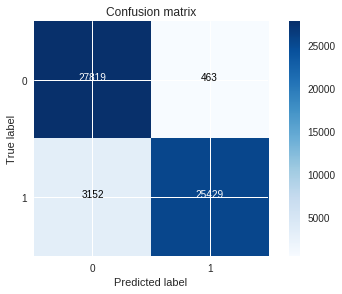

In [20]:
cnf_matrix = confusion_matrix(x_labels_test1, predictions1)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()